## Data

### In computer vision, data takes the form of images.  These are usually 3D arrays, where we have a 2D image with the third dimension corresponding to the different color channels (rgb).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2

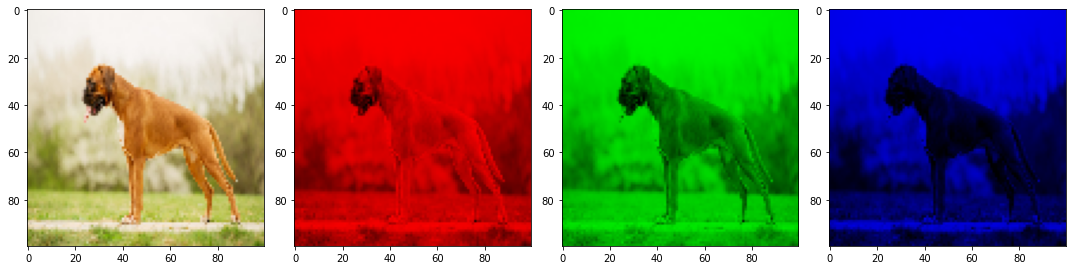

In [57]:
img = cv2.imread("pics/dog.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img = cv2.resize(img,(100,100))

f,axi = plt.subplots(1,4,figsize=(15,15))

red_img = img.copy()
red_img[:,:,1:] = 0

green_img = img.copy()
green_img[:,:,[0,2]] = 0

blue_img = img.copy()
blue_img[:,:,:2] = 0


axi[0].imshow(img)
axi[1].imshow(red_img)
axi[2].imshow(green_img)
axi[3].imshow(blue_img)
plt.tight_layout();

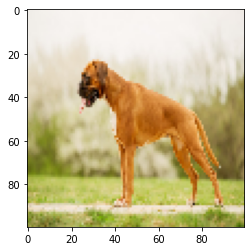

In [58]:
plt.imshow(red_img + green_img + blue_img);

## Images are considered "unstructured" data because the numbers alone don't hold significance.  We can radically change the values of each pixel and still maintain semantic meaning.

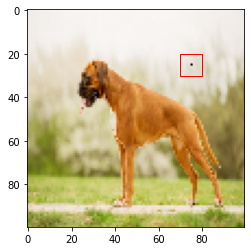

In [60]:
altered_img = img.copy()
altered_img[25,75,:] = 1




fig, ax = plt.subplots()

# Display the image
ax.imshow(altered_img)

# Create a Rectangle patch
rect = patches.Rectangle((70,20),10,10,linewidth=1,edgecolor='r',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect);

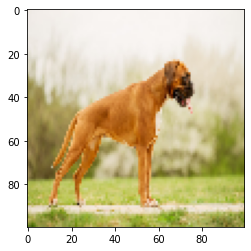

In [61]:
flipped_img = cv2.flip(img,1)

plt.imshow(flipped_img);

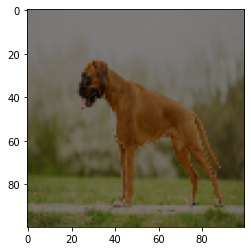

In [62]:
darkened_img = img//2

plt.imshow(darkened_img);

## Image Processing

In [88]:
from skimage.data import camera
from skimage.filters import frangi

In [89]:
norm_img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY).astype(float)
norm_img -= norm_img.min()
norm_img /= norm_img.max()

(array([  19.,   38.,   53.,  284.,  999., 1238., 1200., 1467., 1741.,
        2961.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

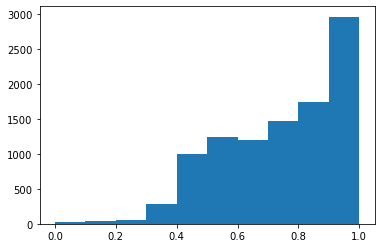

In [93]:
plt.hist(norm_img.reshape(-1))

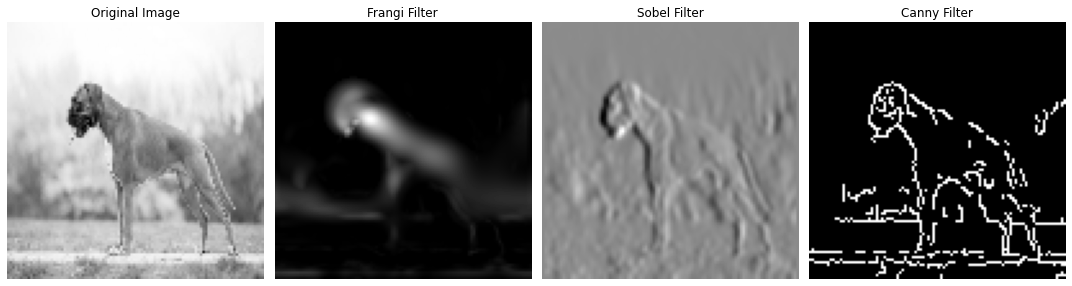

In [95]:
frangi_img = frangi(norm_img)
sobel = cv2.Sobel(np.uint8(norm_img*255),cv2.CV_64F,1,0,ksize=5)
canny = cv2.Canny(np.uint8(norm_img*255),threshold1=200,threshold2=255)

f,axi = plt.subplots(1,4,figsize=(15,15))
[ax.axis("off") for ax in axi.ravel()]

axi[0].imshow(norm_img,cmap="gray")
axi[0].set_title("Original Image")
axi[1].imshow(frangi_img,cmap="gray")
axi[1].set_title("Frangi Filter")
axi[2].imshow(sobel,cmap="gray")
axi[2].set_title("Sobel Filter")
axi[3].imshow(canny,cmap="gray")
axi[3].set_title("Canny Filter")
plt.tight_layout();

In [100]:
def pad(img,kernel):

    kernel_shape = kernel.shape
    padding = ((int((kernel_shape[0]-1)/2),int((kernel_shape[0]-1)/2)),(int((kernel_shape[1]-1)/2),int((kernel_shape[1]-1)/2)))
    
    return np.pad(img,padding,mode="edge")

def convolve(img,kernel):
    
    kernel_shape = kernel.shape
    new_img = np.zeros(img.shape)
    padded_img = pad(img,kernel)
    
    for i in range(padded_img.shape[0]-kernel_shape[0]+1):
        for j in range(padded_img.shape[1]-kernel_shape[1]+1):
            new_img[i,j] = np.sum(padded_img[i:i+kernel.shape[0],j:j+kernel.shape[1]]*kernel)/9

    return new_img    
    

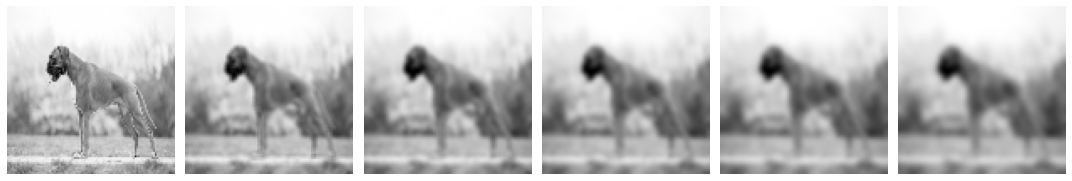

In [101]:
number = 5
gaussian_img = norm_img.copy()

f,axi = plt.subplots(1,number+1,figsize=(15,15))
[ax.axis("off") for ax in axi.ravel()]

axi[0].imshow(gaussian_img,cmap="gray")

for i in range(number):
    
    gaussian_img = convolve(gaussian_img,np.ones((3,3)))
    axi[i+1].imshow(gaussian_img,cmap="gray")
    
plt.tight_layout()

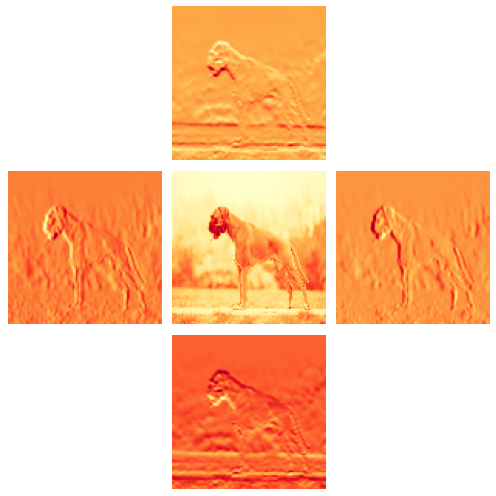

In [109]:
right_img = convolve(norm_img,np.array([[-1,0,1],[-2,0,2],[-1,0,1]]))
left_img = convolve(norm_img,np.array([[1,0,-1],[2,0,-2],[1,0,-1]]))
up_img = convolve(norm_img,np.array([[1,2,1],[0,0,0],[-1,-2,-1]]))
down_img = convolve(norm_img,np.array([[-1,-2,-1],[0,0,0],[1,2,1]]))

color = "YlOrRd_r"

f,axi = plt.subplots(3,3,figsize=(7,7))

[ax.axis("off") for ax in axi.ravel()]

axi[1,1].imshow(norm_img,cmap=color)
axi[2,1].imshow(down_img,cmap=color)
axi[0,1].imshow(up_img,cmap=color)
axi[1,0].imshow(left_img,cmap=color)
axi[1,2].imshow(right_img,cmap=color)
plt.tight_layout();